In [113]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [114]:
def get_dynasty_name(metaDataString): 
    return metaDataString.split("-")[0]  

Import OCR files 

In [115]:
files = [entry for entry in os.listdir() if entry.find(".csv") > 0 and entry[:4] == "kwic"]
print(files)
df = pd.concat(map(pd.read_csv, files)).sort_values('dynFromId')

df

['kwic_先秦_20230116083921.csv', 'kwic_唐五代十國_20230116083921.csv', 'kwic_宋元_20230116083921.csv', 'kwic_明_20230116083921.csv', 'kwic_民國_20230116083921.csv', 'kwic_清_20230116083921.csv', 'kwic_漢_20230116083921.csv', 'kwic_魏晉南北_20230116083921.csv']


,query,dynFromId,meta,left,keyword,right
32,盱,1,Western Zhou-周易-易經,日，貞吉。 六三：,盱,，悔。遲有悔。 九
27,盱,1,Western Zhou-詩經-小雅,有旟。我不見兮、云何,盱,。 終朝采綠、不盈
26,盱,1,Western Zhou-詩經-小雅,車。壹者之來、云何其,盱,爾還而入、我心易
33,盱,1,Western Zhou-周易-象傳,貞吉；以中正也。,盱,有悔，位不當也。
131,眩,3,Spring and Autumn-尚書-商書,心，沃朕心，若藥弗瞑,眩,厥疾弗瘳；若跣弗視地
...,...,...,...,...,...,...
137,瞋,31,Northern Zhou-庾子山集-卷十,披裘公曰取彼金投䥥公,瞋,拂手而言曰何子處之高
824,眩,31,Northern Zhou-靈臺秘苑-卷十至卷十二,陵廟事空邑復起其分臺,眩,其宿有變土工作外軍饑
543,瞑,32,Chen-徐孝穆集-卷七,欲許便作後來新後來瞑,瞑,匡床可憐顏色無比方誰
542,瞑,32,Chen-徐孝穆集-卷七,鈎欲許便作後來新後來,瞑,同匡床可憐顏色無比方


Get occurrences for each dynasty. 
!!!Jin corresponds to two dynasties!!!  

In [116]:
dynasties_sorted = [(dynId, get_dynasty_name(metaDataString)) for (dynId, metaDataString) in zip(df['dynFromId'], df['meta'])]
dynasty_list = list(dict.fromkeys(dynasties_sorted))
dynasty_info = pd.DataFrame(df['dynFromId'].value_counts().sort_index())
dynasty_info.columns = ["occ"]
dynasty_info['name'] = dynasty_list

dynasty_info


,occ,name
1,4,"(1, Western Zhou)"
3,2,"(3, Spring and Autumn)"
4,229,"(4, Warring States)"
5,18,"(5, Qin)"
6,116,"(6, Western Han)"
7,28,"(7, Xin)"
8,156,"(8, Eastern Han)"
9,492,"(9, Han)"
10,100,"(10, Three Kingdoms)"
11,37,"(11, Western Jin)"


Import Tier 1 file 

In [117]:
tier1file = 'tier1.csv'
df_tier1 = pd.read_csv(tier1file).sort_values('dynFromId')
df_tier1

,query,dynFromId,meta,left,keyword,right
1132,盱,1,Western Zhou-詩經-小雅,有旟。我不見兮、云何,盱,。 終朝采綠、不盈
1131,盱,1,Western Zhou-詩經-小雅,車。壹者之來、云何其,盱,爾還而入、我心易
1207,盱,1,Western Zhou-周易-易經,日，貞吉。 六三：,盱,，悔。遲有悔。 九
1208,盱,1,Western Zhou-周易-象傳,貞吉；以中正也。,盱,有悔，位不當也。
2052,眩,3,Spring and Autumn-尚書-商書,心，沃朕心，若藥弗瞑,眩,厥疾弗瘳；若跣弗視地
...,...,...,...,...,...,...
468,瞪,25,Qing-全唐詩-卷六百零九,架為欹危屋。 怒鯨,瞪,向，吹浪山轂轂。倏忽
467,瞪,25,Qing-全唐詩-卷六百零九,颯颯盈荒田。 老牛,瞪,行，力弱誰能鞭。乃將
466,瞪,25,Qing-全唐詩-卷五百七十六,但有沉冥醉客家，支頤,瞪,持流霞。唯恐南國風雨
487,䀹,25,Qing-康熙字典-毛部,，音接。目旁毛也。與,䀹,𣮌𣮍𥇒𠀤同。互見八畫


Occurrences for each dynasty 

In [118]:
dynasties_sorted_tier1 = [(dynId, get_dynasty_name(metaDataString)) for (dynId, metaDataString) in zip(df_tier1['dynFromId'], df_tier1['meta'])]
dynasty_list_tier1 = list(dict.fromkeys(dynasties_sorted_tier1))
dynasty_info_tier1 = pd.DataFrame(df_tier1['dynFromId'].value_counts().sort_index())
dynasty_info_tier1.columns = ["occ"]
dynasty_info_tier1['name'] = dynasty_list_tier1

dynasty_info_tier1


,occ,name
1,4,"(1, Western Zhou)"
3,2,"(3, Spring and Autumn)"
4,143,"(4, Warring States)"
5,2,"(5, Qin)"
6,86,"(6, Western Han)"
7,28,"(7, Xin)"
8,131,"(8, Eastern Han)"
9,13,"(9, Han)"
11,37,"(11, Western Jin)"
13,10,"(13, Jin)"


Amount of data for each dynasty 

Text(0.5, 0, '')

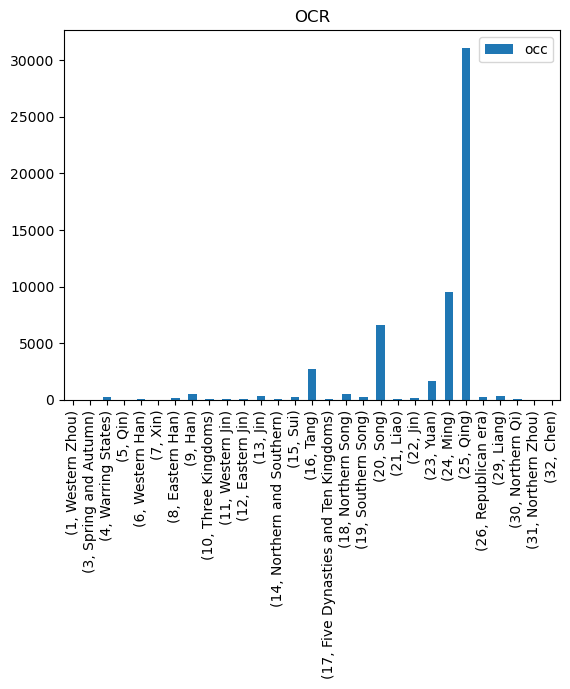

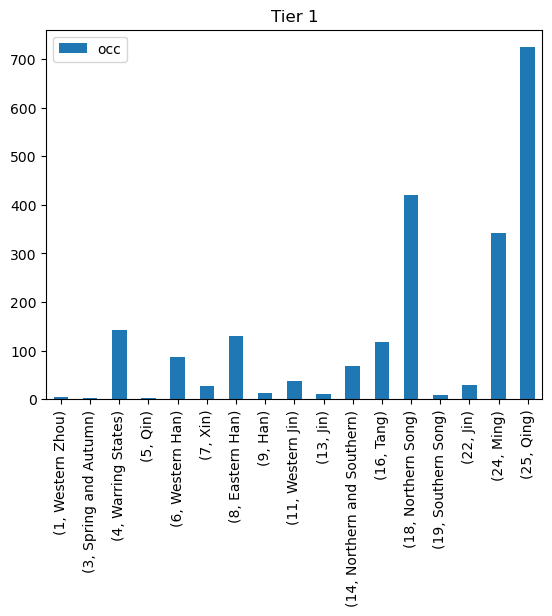

In [126]:
dynasty_info.plot.bar(x='name')
ax = plt.gca()
ax.set_title("OCR")
#ax.set_yscale('log')
ax.set_xlabel('')


dynasty_info_tier1.plot.bar(x='name')
ax = plt.gca()
ax.set_title("Tier 1")
ax.set_xlabel("")

Table words/time for OCR

In [163]:
words = set([word for word in df['query']])

dyn_word_df = pd.DataFrame(data=np.zeros((len(dynasty_list), len(words))), index=dynasty_list, columns=words)
word_dfs = []
for w in words: 
    word_df = df.loc[df['query'] == w].sort_values('dynFromId')
    dynasties_sorted_w = [(dynId, get_dynasty_name(metaDataString)) for (dynId, metaDataString) in zip(word_df['dynFromId'], word_df['meta'])]
    dynasty_list_w = list(dict.fromkeys(dynasties_sorted_w))
    dynasty_info_w = pd.DataFrame(word_df['dynFromId'].value_counts().sort_index())
    dynasty_info_w.columns = [w]
    dynasty_info_w['name'] = dynasty_list_w
    word_dfs.append(dynasty_info_w.copy())
    for (occ, name) in dynasty_info_w.itertuples(index=False):
        dyn_word_df.at[name, w] = occ
dyn_word_df

#dyn_word_df.to_csv("results/ocr_wordsAndDynasties.csv")

,瞋,䀹,瞎,盷,睜,眩,目眩,矉,瞪,瞑,咪,瞚,瞪眼,眨,盱,瞤
"(1, Western Zhou)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
"(3, Spring and Autumn)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(4, Warring States)",16.0,0.0,0.0,0.0,0.0,101.0,18.0,5.0,0.0,71.0,0.0,2.0,0.0,0.0,6.0,10.0
"(5, Qin)",1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0
"(6, Western Han)",20.0,0.0,0.0,0.0,0.0,45.0,2.0,0.0,0.0,22.0,0.0,1.0,0.0,0.0,26.0,0.0
"(7, Xin)",3.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
"(8, Eastern Han)",20.0,1.0,1.0,1.0,0.0,67.0,5.0,2.0,0.0,42.0,0.0,1.0,0.0,1.0,4.0,11.0
"(9, Han)",38.0,0.0,5.0,0.0,0.0,231.0,7.0,0.0,0.0,180.0,0.0,1.0,0.0,0.0,27.0,3.0
"(10, Three Kingdoms)",5.0,0.0,0.0,0.0,0.0,46.0,1.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,6.0,0.0
"(11, Western Jin)",10.0,0.0,0.0,0.0,0.0,15.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0


In [165]:
dyn_word_df.corr()

,瞋,䀹,瞎,盷,睜,眩,目眩,矉,瞪,瞑,咪,瞚,瞪眼,眨,盱,瞤
瞋,1.000000,0.672289,0.942800,0.851361,-0.032192,0.960006,0.937051,0.711570,0.907178,0.962607,0.175858,0.208690,0.038098,0.940006,0.951084,0.278888
䀹,0.672289,1.000000,0.780435,0.913298,0.354149,0.630299,0.644862,0.623104,0.860373,0.634174,0.225476,0.494624,0.733049,0.798879,0.626633,0.408302
瞎,0.942800,0.780435,1.000000,0.926232,0.113249,0.966113,0.956417,0.755904,0.964747,0.967599,0.139831,0.298607,0.238575,0.975400,0.971065,0.376313
盷,0.851361,0.913298,0.926232,1.000000,0.215489,0.847295,0.841380,0.682687,0.956814,0.847095,0.168778,0.401349,0.496079,0.911207,0.849286,0.392419
睜,-0.032192,0.354149,0.113249,0.215489,1.000000,-0.038507,-0.023875,0.404253,0.195857,-0.024293,0.162615,0.936592,0.487946,0.054561,-0.034452,0.741770
眩,0.960006,0.630299,0.966113,0.847295,-0.038507,1.000000,0.980213,0.731553,0.911899,0.998341,0.096736,0.164650,0.025611,0.944601,0.994279,0.307393
目眩,0.937051,0.644862,0.956417,0.841380,-0.023875,0.980213,1.000000,0.718173,0.918296,0.975795,0.221214,0.169511,0.075688,0.938748,0.974473,0.325776
矉,0.711570,0.623104,0.755904,0.682687,0.404253,0.731553,0.718173,1.000000,0.739553,0.732940,0.163950,0.541991,0.142578,0.796290,0.718032,0.769056
瞪,0.907178,0.860373,0.964747,0.956814,0.195857,0.911899,0.918296,0.739553,1.000000,0.908611,0.185219,0.399612,0.385916,0.945413,0.910668,0.418361
瞑,0.962607,0.634174,0.967599,0.847095,-0.024293,0.998341,0.975795,0.732940,0.908611,1.000000,0.104716,0.175180,0.023985,0.945228,0.991690,0.310267


In [164]:
dyn_word_df_tier1 = pd.DataFrame(data=np.zeros((len(dynasty_list), len(words))), index=dynasty_list, columns=words)
word_dfs = []
for w in words: 
    word_df = df_tier1.loc[df_tier1['query'] == w].sort_values('dynFromId')
    dynasties_sorted_w = [(dynId, get_dynasty_name(metaDataString)) for (dynId, metaDataString) in zip(word_df['dynFromId'], word_df['meta'])]
    dynasty_list_w = list(dict.fromkeys(dynasties_sorted_w))
    dynasty_info_w = pd.DataFrame(word_df['dynFromId'].value_counts().sort_index())
    dynasty_info_w.columns = [w]
    dynasty_info_w['name'] = dynasty_list_w
    word_dfs.append(dynasty_info_w.copy())
    for (occ, name) in dynasty_info_w.itertuples(index=False):
        dyn_word_df.at[name, w] = occ
dyn_word_df.to_csv("results/tier1_wordsAndDynasties.csv")
